# Lung Cancer Prediction

In this notebook, we will develop a model to predict lung cancer. We will use various data analysis and machine learning techniques to achieve this goal. 

## Importing Libraries

First, we need to import the necessary libraries for our analysis:

- `numpy`: A fundamental package for scientific computing with Python. It provides support for arrays and matrices, along with a large collection of mathematical functions.
- `pandas`: A library for data manipulation and analysis. It offers data structures and operations for manipulating numerical tables and time series.
- `matplotlib`.`pyplot`: A plotting library used for creating static, interactive, and animated visualizations in Python.
- `seaborn`: A data visualization library based on matplotlib. It provides a high-level interface for drawing attractive and informative statistical graphics.

In [43]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Loading the Dataset

Next, we will load our dataset, which contains survey data related to lung cancer. The dataset is stored in a CSV file named `survey lung cancer.csv`. We will use the `pandas` library to read this file and load the data into a DataFrame. The dataset is available at `https://www.kaggle.com/datasets/mysarahmadbhat/lung-cancer`

In [44]:
data = pd.read_csv('survey lung cancer.csv')
data.head()

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,M,69,1,2,2,1,1,2,1,2,2,2,2,2,2,YES
1,M,74,2,1,1,1,2,2,2,1,1,1,2,2,2,YES
2,F,59,1,1,1,2,1,2,1,2,1,2,2,1,2,NO
3,M,63,2,2,2,1,1,1,1,1,2,1,1,2,2,NO
4,F,63,1,2,1,1,1,1,1,2,1,2,2,1,1,NO


### Summary Statistics

In [45]:
data.describe()

,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN
count,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000
mean,62.673139,1.563107,1.569579,1.498382,1.501618,1.504854,1.673139,1.556634,1.556634,1.556634,1.579288,1.640777,1.469256,1.556634
std,8.210301,0.496806,0.495938,0.500808,0.500808,0.500787,0.469827,0.497588,0.497588,0.497588,0.494474,0.480551,0.499863,0.497588
min,21.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,57.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
50%,62.000000,2.000000,2.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,2.000000
75%,69.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000
max,87.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000


### Missing Values

In [46]:
data.isna().sum()

GENDER                   0
AGE                      0
SMOKING                  0
YELLOW_FINGERS           0
ANXIETY                  0
PEER_PRESSURE            0
CHRONIC DISEASE          0
FATIGUE                  0
ALLERGY                  0
WHEEZING                 0
ALCOHOL CONSUMING        0
COUGHING                 0
SHORTNESS OF BREATH      0
SWALLOWING DIFFICULTY    0
CHEST PAIN               0
LUNG_CANCER              0
dtype: int64

### Data Information

In [47]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309 entries, 0 to 308
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   GENDER                 309 non-null    object
 1   AGE                    309 non-null    int64 
 2   SMOKING                309 non-null    int64 
 3   YELLOW_FINGERS         309 non-null    int64 
 4   ANXIETY                309 non-null    int64 
 5   PEER_PRESSURE          309 non-null    int64 
 6   CHRONIC DISEASE        309 non-null    int64 
 7   FATIGUE                309 non-null    int64 
 8   ALLERGY                309 non-null    int64 
 9   WHEEZING               309 non-null    int64 
 10  ALCOHOL CONSUMING      309 non-null    int64 
 11  COUGHING               309 non-null    int64 
 12  SHORTNESS OF BREATH    309 non-null    int64 
 13  SWALLOWING DIFFICULTY  309 non-null    int64 
 14  CHEST PAIN             309 non-null    int64 
 15  LUNG_CANCER            

In [48]:
data.columns

Index(['GENDER', 'AGE', 'SMOKING', 'YELLOW_FINGERS', 'ANXIETY',
       'PEER_PRESSURE', 'CHRONIC DISEASE', 'FATIGUE ', 'ALLERGY ', 'WHEEZING',
       'ALCOHOL CONSUMING', 'COUGHING', 'SHORTNESS OF BREATH',
       'SWALLOWING DIFFICULTY', 'CHEST PAIN', 'LUNG_CANCER'],
      dtype='object')

### Data Preprocessing

In this section, we perform preprocessing on the dataset to prepare it for further analysis. The following steps are executed:

**Mapping Target Variables**: The target variable 'LUNG_CANCER' and 'GENDER' are mapped to numerical values for binary classification: 'YES' to 1 and 'NO' to 0 for 'LUNG_CANCER', and 'M' to 1 and 'F' to 0 for 'GENDER'.

**Mapping Categorical Features**: Certain categorical features are mapped to numerical values. The dataset uses 2 as 'True' and 1 as 'False'. We change that to 0 and 1.

In [49]:
data['LUNG_CANCER'] = data['LUNG_CANCER'].map({'YES':1, 'NO':0})
data['GENDER'] = data['GENDER'].map({'M':1, 'F':0})

columns_to_convert = ['SMOKING', 'YELLOW_FINGERS', 'ANXIETY','PEER_PRESSURE', 'CHRONIC DISEASE', 'FATIGUE ', 'ALLERGY ', 'WHEEZING','ALCOHOL CONSUMING', 'COUGHING', 'SHORTNESS OF BREATH',
'SWALLOWING DIFFICULTY', 'CHEST PAIN']

mapping = {1: 0, 2: 1}

for col in columns_to_convert:
    data[col] = data[col].replace(mapping)

data.head()

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,1,69,0,1,1,0,0,1,0,1,1,1,1,1,1,1
1,1,74,1,0,0,0,1,1,1,0,0,0,1,1,1,1
2,0,59,0,0,0,1,0,1,0,1,0,1,1,0,1,0
3,1,63,1,1,1,0,0,0,0,0,1,0,0,1,1,0
4,0,63,0,1,0,0,0,0,0,1,0,1,1,0,0,0


### Data Visualization

#### Age Distribution

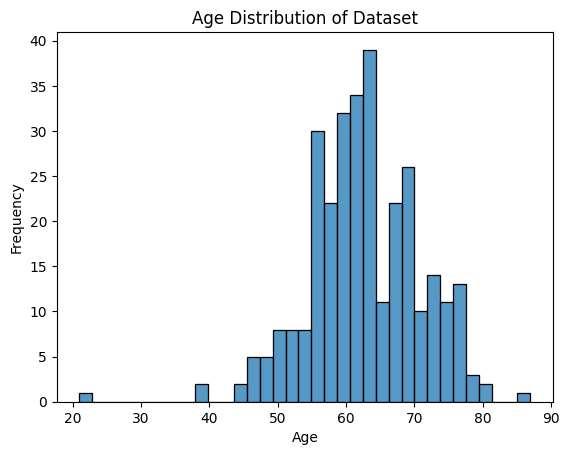

In [50]:
sns.histplot(data['AGE'], bins=35)
plt.title('Age Distribution of Dataset')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

#### Cancer Distribution by Age

In [51]:
cancer_pos = data.loc[data['LUNG_CANCER'] == 1]
cancer_neg = data.loc[data['LUNG_CANCER'] == 0]

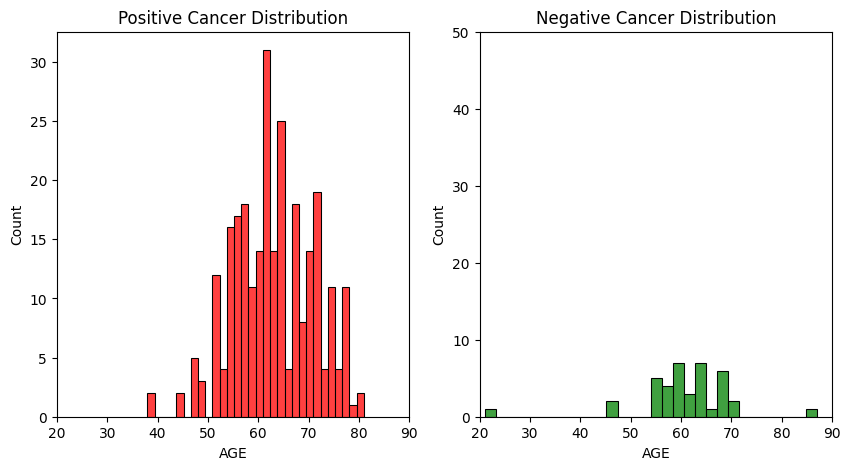

In [52]:
fig, axes = plt.subplots(1, 2, figsize=(10, 5))

sns.histplot(x=cancer_pos['AGE'],ax=axes[0],color='red',bins=30)
axes[0].set_title('Positive Cancer Distribution')
axes[0].set_xlim(20,90)

sns.histplot(x=cancer_neg['AGE'],ax=axes[1],color='green',bins=30)
axes[1].set_title('Negative Cancer Distribution')
axes[1].set_xlim(20,90)

plt.ylim(0,50)
plt.show()

#### Relationship Between Features and Lung Cancer

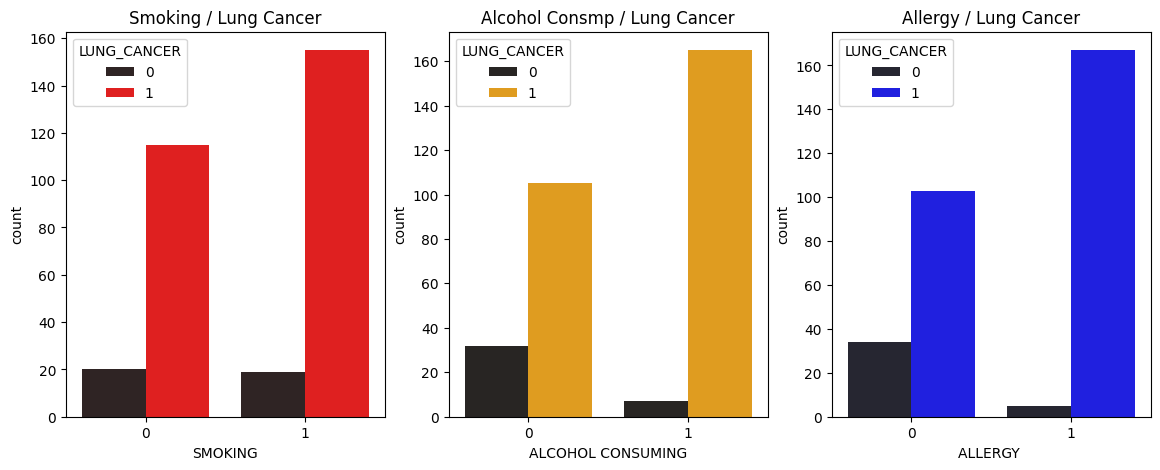

In [53]:
fig, axes = plt.subplots(1, 3, figsize=(14, 5))

sns.countplot(x='SMOKING', hue='LUNG_CANCER', data=data, ax=axes[0], palette='dark:red')
axes[0].set_title('Smoking / Lung Cancer')

sns.countplot(x='ALCOHOL CONSUMING', hue='LUNG_CANCER', data=data, ax=axes[1], palette='dark:orange')
axes[1].set_title('Alcohol Consmp / Lung Cancer')

sns.countplot(x='ALLERGY ', hue='LUNG_CANCER', data=data, ax=axes[2], palette='dark:blue')
axes[2].set_title('Allergy / Lung Cancer')

plt.show()

#### Correlation Heatmap

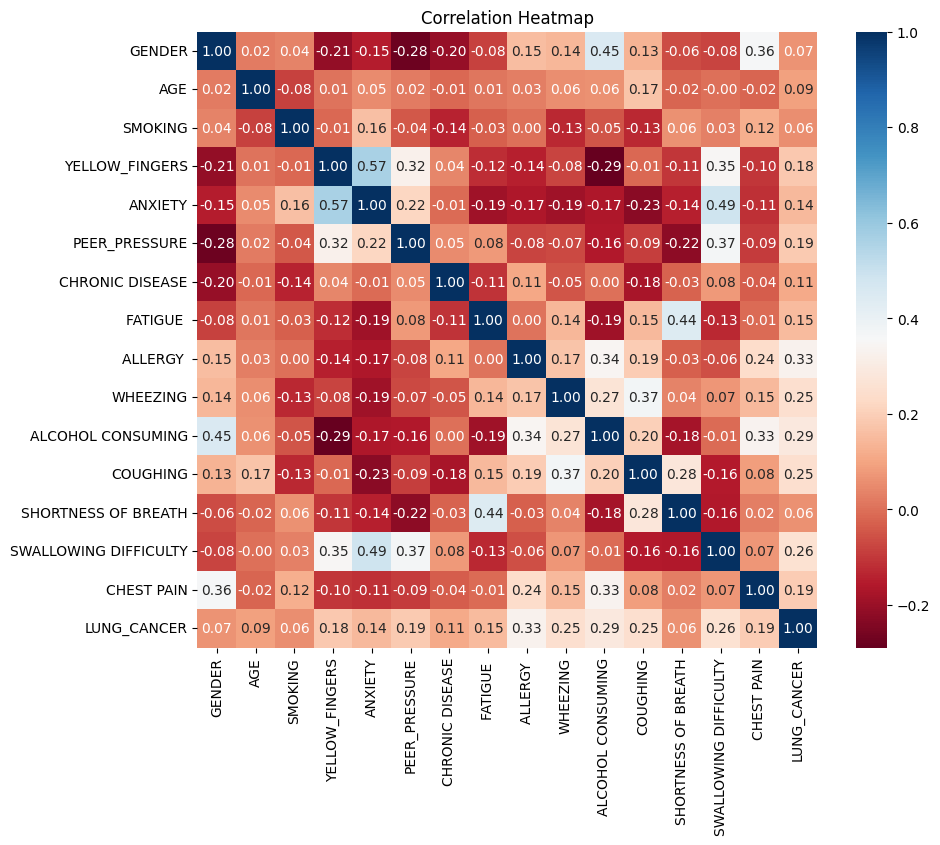

In [54]:
correlation_matrix = data.corr()

plt.figure(figsize=(10, 8)) 
sns.heatmap(correlation_matrix, annot=True, cmap='RdBu', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

### Support Vector Machine (SVM) Model

We utilize the Support Vector Machine (SVM) algorithm for classification, specifically using a linear kernel. Cross-validation is employed to evaluate the model's performance. The average accuracy score of the SVM model, evaluated through 5-fold cross-validation before outlier removal, is displayed.

In [55]:
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score

svc_linear = SVC(kernel='linear')
scores = cross_val_score(svc_linear, data.drop('LUNG_CANCER',axis=1), data['LUNG_CANCER'], cv=5)

print('Scores Before Outlier Removal: %.2f' % (scores.mean()*100))

Scores Before Outlier Removal: 92.25


### Outlier Detection and Removal

To improve the quality of our dataset and subsequently the performance of our model, we apply an outlier detection technique known as Isolation Forest. This method identifies and removes outliers from the dataset.

In [56]:
from sklearn.ensemble import IsolationForest

isolation_forest = IsolationForest(contamination=0.1) 

isolation_forest.fit(data)

outlier_preds = isolation_forest.predict(data)
outlier_indices = outlier_preds == -1

data = data[~outlier_indices]

print('Number of outliers removed:', sum(outlier_indices))

Number of outliers removed: 31


In [57]:
X = data.drop('LUNG_CANCER', axis=1)
y = data['LUNG_CANCER']

In [58]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X = scaler.fit_transform(X)

In [59]:
svc_linear = SVC(kernel='linear')
scores = cross_val_score(svc_linear, data.drop('LUNG_CANCER',axis=1), data['LUNG_CANCER'], cv=5)

print('Scores After Outlier Removal: %.2f' % (scores.mean()*100))

Scores After Outlier Removal: 97.12


### Ensemble Learning with Voting Classifier

Ensemble learning combines multiple base models to improve predictive performance and robustness. In this section, we utilize a Voting Classifier, which aggregates the predictions of multiple classifiers.

**Voting Classifier Configuration**
- Base Classifiers:

- `K-Nearest Neighbors Classifier` (KNN) with 10 neighbors (KNeighborsClassifier)
- `Logistic Regression Classifier` (LogisticRegression)
- `Support Vector Machine` (SVM) Classifier with a linear kernel and probability estimates enabled

**Voting Method:**
Soft voting, where the predicted probabilities from each classifier are averaged to make final predictions.

In [60]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import VotingClassifier

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

rf_clf = KNeighborsClassifier(n_neighbors=10,)
lr_clf = LogisticRegression()
svm_clf = SVC(kernel='linear', probability=True)

voting_clf = VotingClassifier(estimators=[
    ('rf', rf_clf),
    ('lr', lr_clf),
    ('svm', svm_clf)
], voting='soft')

voting_clf.fit(x_train, y_train)

VotingClassifier(estimators=[('rf', KNeighborsClassifier(n_neighbors=10)),
                             ('lr', LogisticRegression()),
                             ('svm', SVC(kernel='linear', probability=True))],
                 voting='soft')

### Model Evaluation

We evaluate the performance of the trained Voting Classifier using various evaluation metrics such as F1-score, accuracy, recall, and precision. These metrics provide insights into the classifier's predictive capabilities.

**Evaluation Metrics**
- F1-score
- Accuracy Score
- Recall Score
- Precision Score

In [61]:
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score

pred = voting_clf.predict(x_test)

f1 = f1_score(y_test, pred)
acc = accuracy_score(y_test, pred)
recl = recall_score(y_test, pred)
prec = precision_score(y_test, pred)

pred_train = voting_clf.predict(x_train)

f1_train = f1_score(y_train, pred_train)
acc_train = accuracy_score(y_train, pred_train)
recl_train = recall_score(y_train, pred_train)
prec_train = precision_score(y_train, pred_train)


print('f1-score on test data: %0.2f' % (f1*100))
print('accuracy score on test data: %0.2f' % (acc*100))
print('recall score on test data: %0.2f' % (recl*100))
print('precision score on test data: %0.2f' % (prec*100))

print('')

print('f1-score on train data: %0.2f' % (f1_train*100))
print('accuracy score on train data: %0.2f' % (acc_train*100))
print('recall score on train data: %0.2f' % (recl_train*100))
print('precision score on train data: %0.2f' % (prec_train*100))

f1-score on test data: 98.11
accuracy score on test data: 96.43
recall score on test data: 98.11
precision score on test data: 98.11

f1-score on train data: 98.32
accuracy score on train data: 96.85
recall score on train data: 99.51
precision score on train data: 97.16


### Confusion Matrix Visualization

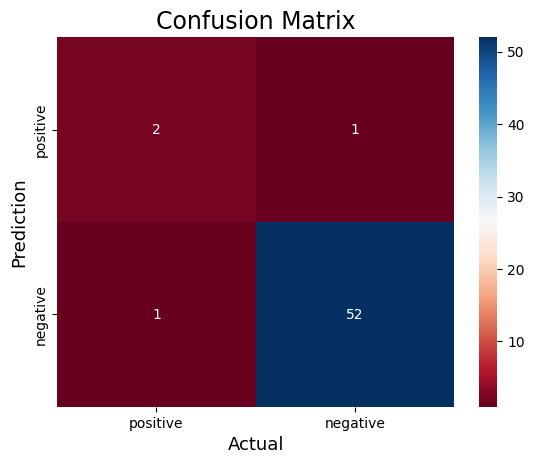

In [62]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test,pred)
sns.heatmap(cm, 
            annot=True,
            cmap='RdBu',
            fmt='g', 
            xticklabels=['positive','negative'],
            yticklabels=['positive','negative'])
plt.ylabel('Prediction',fontsize=13)
plt.xlabel('Actual',fontsize=13)
plt.title('Confusion Matrix',fontsize=17)
plt.show()

### Receiver Operating Characteristic (ROC) Curve

ROC AUC score: 82.39


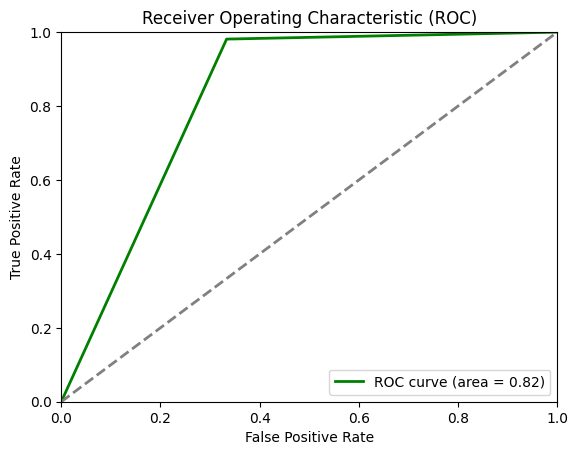

In [63]:
from sklearn.metrics import roc_curve, roc_auc_score

fpr, tpr, thresholds = roc_curve(y_test, pred)
roc_auc = roc_auc_score(y_test, pred)

plt.figure()
plt.plot(fpr, tpr, color='green', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")

print('ROC AUC score: %.2f' % (roc_auc*100))

plt.show()